In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [43]:
!apt install -y fonts-nanum
!fc-cache -fv

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 32 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,456 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 155685 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truety

In [44]:
import platform
plt.rc('figure', figsize=(10, 6))  # 그림 크기 설정
if platform.system() == 'Windows': # 윈도우
    from matplotlib import font_manager, rc
    font_path = "C:/Windows/Fonts/NGULIM.TTF"
    font = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family=font)
elif platform.system() == 'Linux': # 우분투 또는 구글 코랩
    # !sudo apt-get install -y fonts-nanum*
    # !fc-cache -fv
    
    applyfont = "NanumBarunGothic"
    import matplotlib.font_manager as fm
    if not any(map(lambda ft: ft.name == applyfont, fm.fontManager.ttflist)):
        fm.fontManager.addfont("/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")
    plt.rc("font", family=applyfont)
    plt.rc("axes", unicode_minus=False)

In [2]:
base_path = '/content/drive/MyDrive/water_data/'

In [4]:
ysr_yearly = pd.read_excel(base_path+"영산강 통합 데이터.xlsx", 
                            skiprows=0, 
                            sheet_name=None,
                            na_values='ND',
                            parse_dates=True)  # index_col=0, header=1을 제외함

In [5]:
ysr_yearly_pre = {}

for item in ysr_yearly:
    ysr_yearly_pre[item] = ysr_yearly[item].fillna(0)

In [ ]:
for item in ysr_yearly_pre:
    for i in range(1, 49):
        ysr_yearly_pre[item][str(i) + 'shift_수온'] = ysr_yearly_pre[item]['수온(℃)'].shift(i)
        ysr_yearly_pre[item][str(i) + 'shift_BOD'] = ysr_yearly_pre[item]['BOD(㎎/L)'].shift(i)
        ysr_yearly_pre[item][str(i) + 'shift_COD'] = ysr_yearly_pre[item]['COD(㎎/L)'].shift(i)
        ysr_yearly_pre[item][str(i) + 'shift_TN'] = ysr_yearly_pre[item]['TN(㎎/L)'].shift(i)
        ysr_yearly_pre[item][str(i) + 'shift_TP'] = ysr_yearly_pre[item]['TP(㎎/L)'].shift(i)
        ysr_yearly_pre[item][str(i) + 'shift_유량'] = ysr_yearly_pre[item]['유량(㎥/s)'].shift(i)

In [7]:
for item in ysr_yearly_pre:
    ysr_yearly_pre[item] = ysr_yearly_pre[item].fillna(0)

In [8]:
df = pd.DataFrame()
df

""


In [9]:
for item in ysr_yearly_pre:
    df = pd.concat([df, ysr_yearly_pre[item]])

In [102]:
df.columns

Index(['측정소명', '년/월/일', '회차', '수온(℃)', 'DO(㎎/L)', 'BOD(㎎/L)', 'COD(㎎/L)',
       '클로로필 a(㎎/㎥)', 'TN(㎎/L)', 'TP(㎎/L)',
       ...
       '47shift_COD', '47shift_TN', '47shift_TP', '47shift_유량', '48shift_수온',
       '48shift_BOD', '48shift_COD', '48shift_TN', '48shift_TP', '48shift_유량'],
      dtype='object', length=308)

In [103]:
df1 = df.reset_index(drop=True).join(pd.get_dummies(df['측정소명']).reset_index(drop=True))

In [104]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3266 entries, 0 to 3265
Columns: 315 entries, 측정소명 to 함평
dtypes: datetime64[ns](1), float64(305), object(2), uint8(7)
memory usage: 7.7+ MB


In [110]:
col10 = list(df.columns[3:20])

In [12]:
col = list(df1.columns[3:4]) + list(df1.columns[5:10]) + list(df1.columns[19:]) 

In [113]:
col10[4]

'클로로필 a(㎎/㎥)'

In [16]:
from sklearn.preprocessing import StandardScaler

In [114]:
df_ysr = df1.loc[:, col10]

In [ ]:
df_ysr

In [122]:
df_ysr.columns[4]

'클로로필 a(㎎/㎥)'

In [123]:
col10[4]

'클로로필 a(㎎/㎥)'

In [119]:
scaler = StandardScaler()
scaler.fit(df_ysr)
ysr_scaled = scaler.transform(df_ysr)

ysr_df_scaled = pd.DataFrame(data = ysr_scaled, columns = col10)

In [120]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns

In [126]:
col_v = col10[:4] + col10[5:]

In [132]:
col100 = list(ysr_yearly['2_광산'].columns[3:])

In [135]:
col100_v = col100[:4] + col100[5:]

In [138]:
dfdf = ysr_yearly['2_광산'].fillna(0)

In [139]:
X_train, X_test, y_train, y_test = train_test_split(dfdf.loc[:, col100_v], dfdf['클로로필 a(㎎/㎥)'], random_state=42)
gb_reg = GradientBoostingRegressor(max_depth=5, n_estimators=500, learning_rate=0.01, random_state=42)
gb_reg.fit(X_train, np.log1p(y_train))


for score, name in zip(gb_reg.feature_importances_, col_v):
    print(round(score, 2), name)
print('score :', gb_reg.score(X_test, np.log1p(y_test)))

0.05 수온(℃)
0.05 DO(㎎/L)
0.38 BOD(㎎/L)
0.09 COD(㎎/L)
0.01 TN(㎎/L)
0.02 TP(㎎/L)
0.04 TOC(㎎/L)
0.01 수소이온농도
0.09 전기전도도(μS/㎝)
0.02 용존총질소(㎎/L)
0.03 암모니아성 질소(㎎/L)
0.01 질산성 질소(㎎/L)
0.03 용존총인(㎎/L)
0.1 인산염인(㎎/L)
0.06 SS(㎎/L)
0.03 유량(㎥/s)
score : 0.7676808376185024


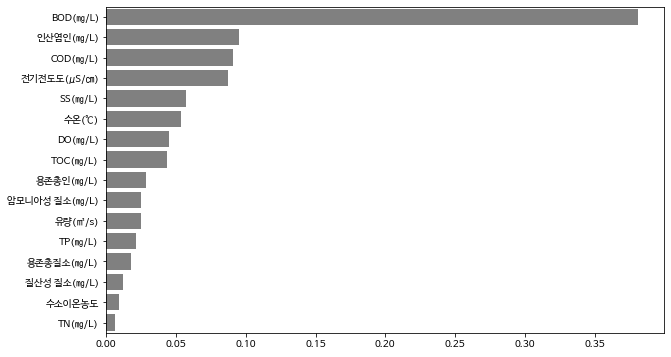

In [140]:
feature_series = pd.Series(data = gb_reg.feature_importances_, index = col_v)
feature_series = feature_series.sort_values(ascending = False)
sns.barplot(x = feature_series, y = feature_series.index, color = 'gray')
plt.show()

In [127]:
X_train, X_test, y_train, y_test = train_test_split(ysr_df_scaled.loc[:, col_v], ysr_df_scaled['클로로필 a(㎎/㎥)'], random_state=42)
gb_reg = GradientBoostingRegressor(max_depth=5, n_estimators=500, learning_rate=0.01, random_state=42)
gb_reg.fit(X_train, np.log1p(y_train))


for score, name in zip(gb_reg.feature_importances_, col_v):
    print(round(score, 2), name)
print('score :', gb_reg.score(X_test, np.log1p(y_test)))

0.02 수온(℃)
0.04 DO(㎎/L)
0.45 BOD(㎎/L)
0.05 COD(㎎/L)
0.01 TN(㎎/L)
0.01 TP(㎎/L)
0.01 TOC(㎎/L)
0.03 수소이온농도
0.03 전기전도도(μS/㎝)
0.02 용존총질소(㎎/L)
0.01 암모니아성 질소(㎎/L)
0.02 질산성 질소(㎎/L)
0.04 용존총인(㎎/L)
0.06 인산염인(㎎/L)
0.03 SS(㎎/L)
0.18 유량(㎥/s)
score : 0.7717279626303398


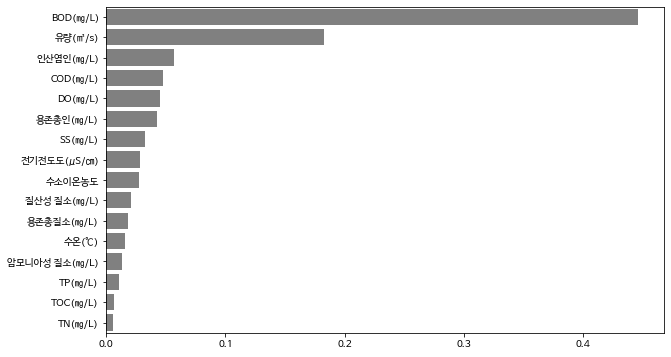

In [128]:
feature_series = pd.Series(data = gb_reg.feature_importances_, index = col_v)
feature_series = feature_series.sort_values(ascending = False)
sns.barplot(x = feature_series, y = feature_series.index, color = 'gray')
plt.show()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(ysr_df_scaled.loc[:, col_v], ysr_df_scaled['클로로필 a(㎎/㎥)'], random_state=42)
gb_reg = GradientBoostingRegressor(max_depth=5, n_estimators=500, learning_rate=0.02, random_state=42)
gb_reg.fit(X_train, np.log1p(y_train))


for score, name in zip(gb_reg.feature_importances_, col_v):
    print(round(score, 2), name)
print('score :', gb_reg.score(X_test, np.log1p(y_test)))

0.01 수온(℃)
0.42 BOD(㎎/L)
0.05 COD(㎎/L)
0.01 TN(㎎/L)
0.02 TP(㎎/L)
0.03 유량(㎥/s)
0.01 1shift_수온
0.0 1shift_BOD
0.0 1shift_COD
0.0 1shift_TN
0.0 1shift_TP
0.0 1shift_유량
0.0 2shift_수온
0.0 2shift_BOD
0.0 2shift_COD
0.0 2shift_TN
0.0 2shift_TP
0.01 2shift_유량
0.0 3shift_수온
0.0 3shift_BOD
0.0 3shift_COD
0.0 3shift_TN
0.0 3shift_TP
0.0 3shift_유량
0.0 4shift_수온
0.0 4shift_BOD
0.0 4shift_COD
0.0 4shift_TN
0.0 4shift_TP
0.14 4shift_유량
0.0 5shift_수온
0.0 5shift_BOD
0.0 5shift_COD
0.0 5shift_TN
0.0 5shift_TP
0.0 5shift_유량
0.0 6shift_수온
0.0 6shift_BOD
0.0 6shift_COD
0.0 6shift_TN
0.01 6shift_TP
0.01 6shift_유량
0.0 7shift_수온
0.0 7shift_BOD
0.0 7shift_COD
0.0 7shift_TN
0.0 7shift_TP
0.0 7shift_유량
0.0 8shift_수온
0.0 8shift_BOD
0.0 8shift_COD
0.0 8shift_TN
0.0 8shift_TP
0.0 8shift_유량
0.0 9shift_수온
0.0 9shift_BOD
0.0 9shift_COD
0.0 9shift_TN
0.0 9shift_TP
0.0 9shift_유량
0.0 10shift_수온
0.0 10shift_BOD
0.0 10shift_COD
0.0 10shift_TN
0.0 10shift_TP
0.0 10shift_유량
0.0 11shift_수온
0.0 11shift_BOD
0.0 11shift_COD
0.0 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(ysr_df_scaled.loc[:, col_v], ysr_df_scaled['클로로필 a(㎎/㎥)'], random_state=42)
gb_reg = GradientBoostingRegressor(max_depth=5, n_estimators=500, learning_rate=0.03, random_state=42)
gb_reg.fit(X_train, np.log1p(y_train))


for score, name in zip(gb_reg.feature_importances_, col_v):
    print(round(score, 2), name)
print('score :', gb_reg.score(X_test, np.log1p(y_test)))

0.01 수온(℃)
0.41 BOD(㎎/L)
0.05 COD(㎎/L)
0.01 TN(㎎/L)
0.02 TP(㎎/L)
0.03 유량(㎥/s)
0.0 1shift_수온
0.0 1shift_BOD
0.0 1shift_COD
0.0 1shift_TN
0.0 1shift_TP
0.0 1shift_유량
0.0 2shift_수온
0.0 2shift_BOD
0.0 2shift_COD
0.0 2shift_TN
0.0 2shift_TP
0.0 2shift_유량
0.0 3shift_수온
0.0 3shift_BOD
0.0 3shift_COD
0.0 3shift_TN
0.0 3shift_TP
0.0 3shift_유량
0.0 4shift_수온
0.0 4shift_BOD
0.0 4shift_COD
0.0 4shift_TN
0.0 4shift_TP
0.13 4shift_유량
0.0 5shift_수온
0.0 5shift_BOD
0.0 5shift_COD
0.0 5shift_TN
0.0 5shift_TP
0.0 5shift_유량
0.0 6shift_수온
0.0 6shift_BOD
0.0 6shift_COD
0.0 6shift_TN
0.01 6shift_TP
0.01 6shift_유량
0.0 7shift_수온
0.0 7shift_BOD
0.0 7shift_COD
0.0 7shift_TN
0.0 7shift_TP
0.0 7shift_유량
0.0 8shift_수온
0.0 8shift_BOD
0.0 8shift_COD
0.0 8shift_TN
0.0 8shift_TP
0.0 8shift_유량
0.0 9shift_수온
0.0 9shift_BOD
0.0 9shift_COD
0.0 9shift_TN
0.0 9shift_TP
0.0 9shift_유량
0.0 10shift_수온
0.0 10shift_BOD
0.0 10shift_COD
0.0 10shift_TN
0.0 10shift_TP
0.0 10shift_유량
0.0 11shift_수온
0.0 11shift_BOD
0.0 11shift_COD
0.0 11

In [30]:
X_train, X_test, y_train, y_test = train_test_split(ysr_df_scaled.loc[:, col_v], ysr_df_scaled['클로로필 a(㎎/㎥)'], random_state=42)
gb_reg = GradientBoostingRegressor(max_depth=5, n_estimators=500, learning_rate=0.1, random_state=42)
gb_reg.fit(X_train, np.log1p(y_train))


for score, name in zip(gb_reg.feature_importances_, col_v):
    print(round(score, 2), name)
print('score :', gb_reg.score(X_test, np.log1p(y_test)))

0.01 수온(℃)
0.4 BOD(㎎/L)
0.04 COD(㎎/L)
0.01 TN(㎎/L)
0.02 TP(㎎/L)
0.02 유량(㎥/s)
0.01 1shift_수온
0.0 1shift_BOD
0.0 1shift_COD
0.0 1shift_TN
0.0 1shift_TP
0.0 1shift_유량
0.0 2shift_수온
0.0 2shift_BOD
0.0 2shift_COD
0.0 2shift_TN
0.0 2shift_TP
0.01 2shift_유량
0.0 3shift_수온
0.0 3shift_BOD
0.0 3shift_COD
0.0 3shift_TN
0.0 3shift_TP
0.0 3shift_유량
0.0 4shift_수온
0.0 4shift_BOD
0.0 4shift_COD
0.0 4shift_TN
0.0 4shift_TP
0.13 4shift_유량
0.0 5shift_수온
0.0 5shift_BOD
0.0 5shift_COD
0.0 5shift_TN
0.0 5shift_TP
0.0 5shift_유량
0.0 6shift_수온
0.0 6shift_BOD
0.0 6shift_COD
0.0 6shift_TN
0.01 6shift_TP
0.01 6shift_유량
0.0 7shift_수온
0.0 7shift_BOD
0.0 7shift_COD
0.0 7shift_TN
0.0 7shift_TP
0.01 7shift_유량
0.0 8shift_수온
0.0 8shift_BOD
0.0 8shift_COD
0.0 8shift_TN
0.0 8shift_TP
0.0 8shift_유량
0.0 9shift_수온
0.0 9shift_BOD
0.0 9shift_COD
0.0 9shift_TN
0.0 9shift_TP
0.0 9shift_유량
0.0 10shift_수온
0.0 10shift_BOD
0.0 10shift_COD
0.0 10shift_TN
0.0 10shift_TP
0.0 10shift_유량
0.0 11shift_수온
0.0 11shift_BOD
0.0 11shift_COD
0.0 

In [40]:
X_train, X_test, y_train, y_test = train_test_split(ysr_df_scaled.loc[:, col_v], ysr_df_scaled['클로로필 a(㎎/㎥)'], random_state=42)
gb_reg = GradientBoostingRegressor(max_depth=5, n_estimators=500, learning_rate=0.1, random_state=42)
gb_reg.fit(X_train, np.log1p(y_train))


for score, name in zip(gb_reg.feature_importances_, col_v):
    print(round(score, 2), name)
print('score :', gb_reg.score(X_test, np.log1p(y_test)))

0.01 수온(℃)
0.4 BOD(㎎/L)
0.04 COD(㎎/L)
0.01 TN(㎎/L)
0.02 TP(㎎/L)
0.02 유량(㎥/s)
0.01 1shift_수온
0.0 1shift_BOD
0.0 1shift_COD
0.0 1shift_TN
0.0 1shift_TP
0.0 1shift_유량
0.0 2shift_수온
0.0 2shift_BOD
0.0 2shift_COD
0.0 2shift_TN
0.0 2shift_TP
0.01 2shift_유량
0.0 3shift_수온
0.0 3shift_BOD
0.0 3shift_COD
0.0 3shift_TN
0.0 3shift_TP
0.0 3shift_유량
0.0 4shift_수온
0.0 4shift_BOD
0.0 4shift_COD
0.0 4shift_TN
0.0 4shift_TP
0.13 4shift_유량
0.0 5shift_수온
0.0 5shift_BOD
0.0 5shift_COD
0.0 5shift_TN
0.0 5shift_TP
0.0 5shift_유량
0.0 6shift_수온
0.0 6shift_BOD
0.0 6shift_COD
0.0 6shift_TN
0.01 6shift_TP
0.01 6shift_유량
0.0 7shift_수온
0.0 7shift_BOD
0.0 7shift_COD
0.0 7shift_TN
0.0 7shift_TP
0.01 7shift_유량
0.0 8shift_수온
0.0 8shift_BOD
0.0 8shift_COD
0.0 8shift_TN
0.0 8shift_TP
0.0 8shift_유량
0.0 9shift_수온
0.0 9shift_BOD
0.0 9shift_COD
0.0 9shift_TN
0.0 9shift_TP
0.0 9shift_유량
0.0 10shift_수온
0.0 10shift_BOD
0.0 10shift_COD
0.0 10shift_TN
0.0 10shift_TP
0.0 10shift_유량
0.0 11shift_수온
0.0 11shift_BOD
0.0 11shift_COD
0.0 

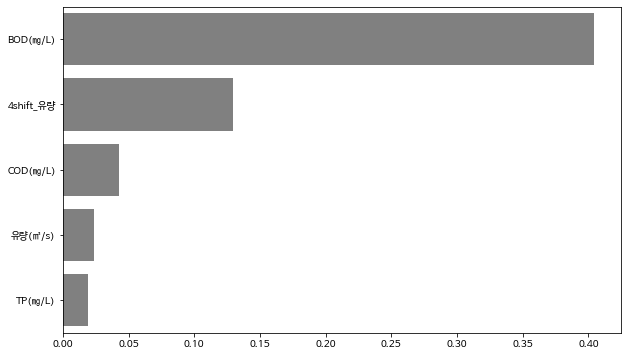

In [45]:
feature_series = pd.Series(data = gb_reg.feature_importances_, index = col_v)
feature_series = feature_series.sort_values(ascending = False)
sns.barplot(x = feature_series[:5], y = feature_series.index[:5], color = 'gray')
plt.show()

In [82]:
predict_x = (np.expm1(gb_reg.predict(X_test)) * df1['클로로필 a(㎎/㎥)'].std() + df1['클로로필 a(㎎/㎥)'].mean())

In [83]:
real_val = (y_test * df1['클로로필 a(㎎/㎥)'].std() + df1['클로로필 a(㎎/㎥)'].mean())

In [101]:
len(sorted(abs(predict_x - real_val), reverse=True))

817

In [100]:
sorted(abs(predict_x - real_val), reverse=True)[:10]

[121.01861172755656,
 111.31006053388529,
 79.47637909556377,
 78.98709220684228,
 73.53302446542479,
 73.02694585870506,
 69.60842968733849,
 69.09971979053005,
 61.779337903623514,
 61.58006428193633]

In [88]:
abs(predict_x - real_val)[abs(predict_x - real_val) == 121.01861172755656]

887    121.018612
Name: 클로로필 a(㎎/㎥), dtype: float64

In [90]:
real_val[887]  # 예측값 110 정도..

230.83128726673002

In [91]:
abs(predict_x - real_val)[abs(predict_x - real_val) == 111.31006053388529]

889    111.310061
Name: 클로로필 a(㎎/㎥), dtype: float64

In [94]:
real_val[889]  # 예측값 93 정도..

204.72729063551446

In [92]:
df1[880:895]

,측정소명,년/월/일,회차,수온(℃),DO(㎎/L),BOD(㎎/L),COD(㎎/L),클로로필 a(㎎/㎥),TN(㎎/L),TP(㎎/L),...,48shift_TN,48shift_TP,48shift_유량,광산,무안2,문평천,영산포2,장성천2,평동천,함평
880,광산,2020-08-03,1회차,25.3,6.5,3.9,5.7,5.2,3.169,0.154,...,3.330,0.102,27.340,1,0,0,0,0,0,0
881,광산,2020-08-19,2회차,29.7,7.9,4.3,7.8,57.5,3.472,0.180,...,3.690,0.078,0.000,1,0,0,0,0,0,0
882,광산,2020-08-24,3회차,29.3,7.0,4.7,8.2,45.3,4.240,0.110,...,3.045,0.238,46.592,1,0,0,0,0,0,0
883,광산,2020-09-01,1회차,28.3,6.1,4.8,8.0,24.1,2.511,0.218,...,3.832,0.072,20.979,1,0,0,0,0,0,0
884,광산,2020-09-08,2회차,21.5,7.4,3.7,6.4,4.2,2.218,0.172,...,2.883,0.162,73.722,1,0,0,0,0,0,0
885,광산,2020-09-14,3회차,23.3,7.2,3.1,5.4,6.0,2.545,0.144,...,3.606,0.093,27.399,1,0,0,0,0,0,0
886,광산,2020-09-21,4회차,22.7,10.9,4.5,8.3,71.5,2.948,0.091,...,3.397,0.079,43.254,1,0,0,0,0,0,0
887,광산,2020-09-28,5회차,23.5,13.5,6.8,13.5,230.8,4.192,0.083,...,3.984,0.055,27.438,1,0,0,0,0,0,0
888,광산,2020-10-05,1회차,22.2,10.5,5.4,11.7,184.4,4.236,0.094,...,4.452,0.060,20.164,1,0,0,0,0,0,0
889,광산,2020-10-12,2회차,21.2,13.9,4.5,12.9,204.7,4.549,0.113,...,4.791,0.056,8.700,1,0,0,0,0,0,0


In [96]:
ysr_yearly['2_광산'][ysr_yearly['2_광산']['클로로필 a(㎎/㎥)'] > 200]

,측정소명,년/월/일,회차,수온(℃),DO(㎎/L),BOD(㎎/L),COD(㎎/L),클로로필 a(㎎/㎥),TN(㎎/L),TP(㎎/L),TOC(㎎/L),수소이온농도,전기전도도(μS/㎝),용존총질소(㎎/L),암모니아성 질소(㎎/L),질산성 질소(㎎/L),용존총인(㎎/L),인산염인(㎎/L),SS(㎎/L),유량(㎥/s)
447,광산,2020-09-28,5회차,23.5,13.5,6.8,13.5,230.8,4.192,0.083,7.0,8.7,322.0,3.904,1.247,1.773,0.019,0.002,22.9,17.855
449,광산,2020-10-12,2회차,21.2,13.9,4.5,12.9,204.7,4.549,0.113,4.6,8.9,356.0,3.986,1.105,2.054,0.019,0.007,24.7,16.995
474,광산,2021-04-12,2회차,17.4,12.4,6.9,12.3,224.1,4.740,0.170,4.8,8.2,324.0,4.187,1.352,2.099,0.028,0.008,24.4,20.078
475,광산,2021-04-19,3회차,15.2,14.2,6.8,13.6,228.3,5.668,0.166,4.5,8.3,341.0,4.707,1.614,2.456,0.029,0.004,22.7,11.673
